In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.models.mask_SIR import sweep_pol_mask_maskSIR
from src.models.mask_SIR_D import sweep_pol_mask_maskSIRD
from src.utils.distributions import pol_to_alpha, homogeneous_distribution
from plot_functions import *
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

path_Plot_with_labels = "../figures/with_labels/"
path_Plot_without_labels = "../figures/no_labels/"

if not os.path.exists(path_Plot_with_labels):
    os.makedirs(path_Plot_with_labels)

if not os.path.exists(path_Plot_without_labels):
    os.makedirs(path_Plot_without_labels)
def ALPHAS(Np):
    return pol_to_alpha(np.linspace(1/Np/2, 1-1/Np/2, Np)/4)



my_hot_r = discretize_cmaps('hot_r', 10)
my_hot_r.set_bad('gray')

my_vir_r = discretize_cmaps('viridis_r', 10)
my_vir_r.set_bad('gray')

In [3]:
# color palettes

CP1 = ['#7b3294','#c2a5cf','#000','#a6dba0','#008837']
CP1 = ['#d9f0a3','#78c679','#000','#238443','#004529']      # MEAN
CP2 = ['#fdbb84','#fc8d59','#ef6548','#d7301f','#990000']   # POL
CP3 = ['#a6bddb','#74a9cf','#000','#0570b0','#034e7b']      # HOM

In [4]:
NP = 50
NS = 50

mask_max_range={"m": 0, "M": 1, "n": NS}  # Range for maximum mask-wearing
pol_range={"m": 0, "M": 1, "n": NP}

results = sweep_pol_mask_maskSIRD(
    mask_max_range=mask_max_range,    # Changed from susc_max_range
    pol_range=pol_range,
    dT=0.1,
    T=1000,
    beta_M=0.2,                       # Added: maximum base susceptibility
    batch_size=1000,
    N_COMPARTMENTS=100,
    SPB_exponent=1
)

(S_final, I_final, R_final), R0, OH = results
S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

S = S.reshape(NP, NS).transpose()
I = I.reshape(NP, NS).transpose()
R = R.reshape(NP, NS).transpose()
R0 = R0.reshape(NP, NS).transpose()
OH = OH.reshape(NP, NS).transpose()

FIG_A_RI = R + I

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [5]:
NP = 50
NS = 50

mask_max_range={"m": 0, "M": 1, "n": NS}  # Range for maximum mask-wearing
pol_range={"m": 0, "M": 1, "n": NP}

results = sweep_pol_mask_maskSIR(
    mask_max_range=mask_max_range,    # Changed from susc_max_range
    pol_range=pol_range,
    h=0,
    dT=0.1,
    T=1000,
    beta_M=0.2,                       # Added: maximum base susceptibility
    batch_size=1000,
    N_COMPARTMENTS=100,
    SPB_exponent=1
)

(S_final, I_final, R_final), R0, OH = results
S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

S = S.reshape(NP, NS).transpose()
I = I.reshape(NP, NS).transpose()
R = R.reshape(NP, NS).transpose()
R0 = R0.reshape(NP, NS).transpose()
OH = OH.reshape(NP, NS).transpose()

FIG_B_RI = R + I

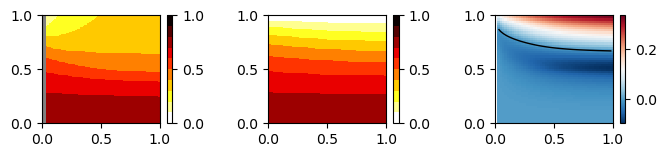

In [6]:
pol = homogeneous_distribution(NP, 0, 1)
mu = homogeneous_distribution(NS, 0, 1)

fig, axs = plt.subplots(1,3, figsize=(3*Lx, Ly))
im0 = axs[0].imshow(FIG_A_RI, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1)
im1 = axs[1].imshow(FIG_B_RI, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1)
im2 = axs[2].imshow(FIG_A_RI - FIG_B_RI, cmap =  "RdBu_r", aspect = "auto", origin = "lower", extent = [0,1,0,1],  interpolation = "none")
# plot contour lines in axs2

cs = axs[2].contour(pol, mu, FIG_A_RI - FIG_B_RI, levels = [0], linewidths = 1, colors = "black", linestyles = "solid")

# add colorbar to axs2
cbar = fig.colorbar(im0, ax=axs[0])
cbar = fig.colorbar(im1, ax=axs[1])
cbar = fig.colorbar(im2, ax=axs[2])

fig.tight_layout()

# Here what Viola requested

In [7]:
NP = 100
NS = 1
N_COMPARTMENTS = 100
mask_max_range={"m": 0, "M": 2, "n": NS}  #  I want the mask wearing to be 1.
pol_range={"m": 0, "M": 1, "n": NP}
pols = homogeneous_distribution(NP, 0, 1)

results = sweep_pol_mask_maskSIR(
    mask_max_range=mask_max_range,    # Changed from susc_max_range
    pol_range=pol_range,
    dT=0.1,
    T=1000,
    beta_M=0.25,                       # Added: maximum base susceptibility
    batch_size=1000,
    N_COMPARTMENTS=N_COMPARTMENTS,
    SPB_exponent=1
)

(S_final, I_final, R_final), _, _ = results

S = S_final.reshape(NP, N_COMPARTMENTS).transpose()
I = I_final.reshape(NP, N_COMPARTMENTS).transpose()
R = R_final.reshape(NP, N_COMPARTMENTS).transpose()

Sf = np.zeros((N_COMPARTMENTS, NP))
If = np.zeros((N_COMPARTMENTS, NP))
Rf = np.zeros((N_COMPARTMENTS, NP))
for i in range(NP):

    N_i = S_final[i,:] + I_final[i,:] + R_final[i,:]
    Sf[:,i] = S_final[i,:]/N_i
    If[:,i] = I_final[i,:]/N_i
    Rf[:,i] = R_final[i,:]/N_i

# normalize them: N_i = S


RI = Rf + If

In [8]:
results = sweep_pol_mask_maskSIRD(
    mask_max_range=mask_max_range,    # Changed from susc_max_range
    pol_range=pol_range,
    dT=0.1,
    T=1000,
    beta_M=0.25,                       # Added: maximum base susceptibility
    batch_size=100,
    N_COMPARTMENTS=N_COMPARTMENTS,
    SPB_exponent=1
)

(S_final, I_final, R_final), _, _ = results

S = S_final.reshape(NP, N_COMPARTMENTS).transpose()
I = I_final.reshape(NP, N_COMPARTMENTS).transpose()
R = R_final.reshape(NP, N_COMPARTMENTS).transpose()

Sf = np.zeros((N_COMPARTMENTS, NP))
If = np.zeros((N_COMPARTMENTS, NP))
Rf = np.zeros((N_COMPARTMENTS, NP))
for i in range(NP):

    N_i = S_final[i,:] + I_final[i,:] + R_final[i,:]
    Sf[:,i] = S_final[i,:]/N_i
    If[:,i] = I_final[i,:]/N_i
    Rf[:,i] = R_final[i,:]/N_i

# normalize them: N_i = S

RI_D = Rf + If

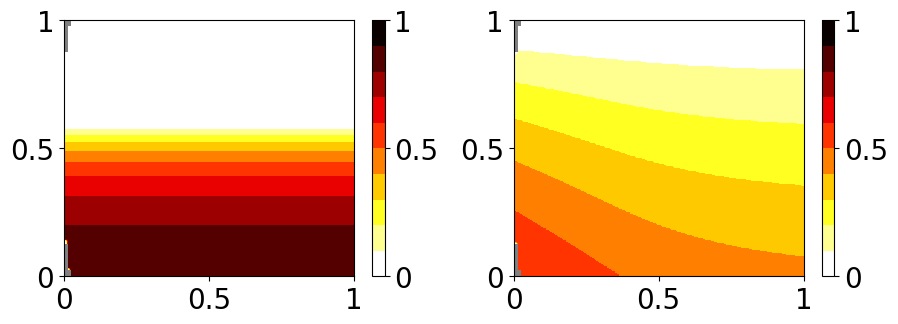

In [9]:
RI.shape
fig, axs = plt.subplots(1,2, figsize=(4*Lx, 2*Ly))

im0 = axs[0].imshow(RI_D, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1)
# change the fontsize of the xticks and yticks
axs[0].set_xticks([0,0.5,1])
axs[0].set_yticks([0,0.5,1])
axs[0].set_yticklabels([0,0.5,1], fontsize = 20)
axs[0].set_xticklabels([0,0.5,1], fontsize = 20)
cbar = fig.colorbar(im0, ax = axs[0])
cbar.ax.set_yticks([0,0.5,1])
cbar.ax.set_yticklabels([0,0.5,1], fontsize = 20)


im1 = axs[1].imshow(RI, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1)
cbar = fig.colorbar(im1, ax = axs[1])

# change the fontsize of the xticks and yticks
axs[1].set_xticks([0,0.5,1])
axs[1].set_yticks([0,0.5,1])
axs[1].set_yticklabels([0,0.5,1], fontsize = 20)
axs[1].set_xticklabels([0,0.5,1], fontsize = 20)
cbar.ax.set_yticks([0,0.5,1])

cbar.ax.set_yticklabels([0,0.5,1], fontsize = 20)

fig.tight_layout()

TypeError: double_savefig() missing 1 required positional argument: 'path_Plot_without_labels'

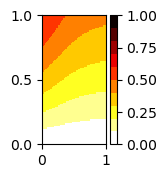

In [18]:
fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(np.flipud(RI), cmap = my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1, interpolation = "none")
cbar = fig.colorbar(cax, ax = ax)
ax.set_yticks([0,0.5,1])

fig.patch.set_visible(False)
name = "RI_fraction_SIR_masks.pdf"
double_savefig(fig, name, path_Plot_with_labels, path_Plot_without_labels)

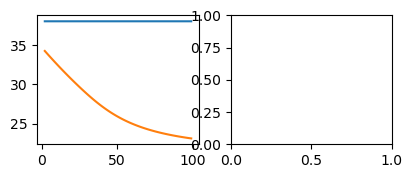

In [14]:
# now plot the sum of each figure for each column:

fig, axs = plt.subplots(1,2, figsize=(2*Lx, Ly))

axs[0].plot(np.sum(RI_D, axis = 0), label = "SIRD")
axs[0].plot(np.sum(RI, axis = 0), label = "SIR")

In [11]:
import matplotlib.pyplot as plt

(-40.0, 0.0)

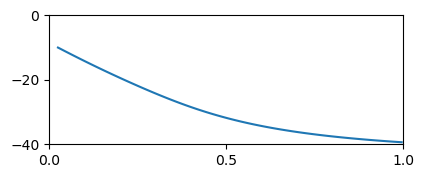

In [12]:
D = np.sum(RI_D, axis = 0)
C = np.sum(RI, axis = 0)

fig, axs = plt.subplots(1,1, figsize=(2*Lx, Ly))



axs.plot(pols,(C/D-1)*100, label = "SIRD")
axs.set_xticks([0,0.5,1])
axs.set_yticks([-40,-20,0])
axs.set_xlim([0,1])
axs.set_ylim([-40,0])